In [1]:
! pip3 install sklearn --upgrade --no-cache-dir
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor, plot_importance
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
import numpy as np
import pandas as pd

  Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "c:\users\kalju\appdata\local\programs\python\python38\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _dep_map
    return self.__dep_map
  File "c:\users\kalju\appdata\local\programs\python\python38\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\kalju\appdata\local\programs\python\python38\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3003, in _parsed_pkg_info
    return self._pkg_info
  File "c:\users\kalju\appdata\local\programs\python\python38\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another e

ImportError: cannot import name 'permutation_importance' from 'sklearn.inspection' (C:\Users\kalju\Anaconda3\lib\site-packages\sklearn\inspection\__init__.py)

In [4]:
revenue_df = pd.read_csv('data/total_revenues_smartphone_sales_datetime.csv')
output_scaler = MinMaxScaler()
revenue_df['total_revenues'] = output_scaler.fit_transform(np.array(revenue_df['total_revenues']).reshape(-1, 1))
revenue_df.head()

NameError: name 'pd' is not defined

- Use XBGRegressor model (similar to Random Forrest)
- Updates weights at run time
- Feature impmportance will be given based on XBGRegressor model only

[10:12:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


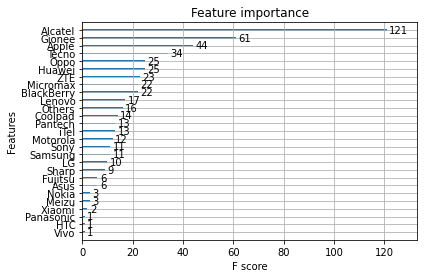

In [ ]:
model_xgb = XGBRegressor()
# fit the model
model_xgb.fit(revenue_df.drop(['total_revenues', 'Month'], axis=1), revenue_df['total_revenues'])
# get importance
plot_importance(model_xgb)

Alcatel, Gionee, Apple, Tecno, Oppo and Huawei top 5

*  **Permutation Feature Importance for Regression**
* [Sklearen Permutation Importance](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html)

Feature: 0, Score: 0.00529
Feature: 1, Score: 0.00197
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00186
Feature: 4, Score: 0.00002
Feature: 5, Score: 0.00013
Feature: 6, Score: 0.00283
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.01842
Feature: 10, Score: 0.00160
Feature: 11, Score: 0.00006
Feature: 12, Score: 0.00011
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00014
Feature: 15, Score: 0.00005
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00088
Feature: 18, Score: 0.00013
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00141
Feature: 21, Score: 0.00011
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00001
Feature: 24, Score: 0.00642
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00005
Feature: 29, Score: 0.00000


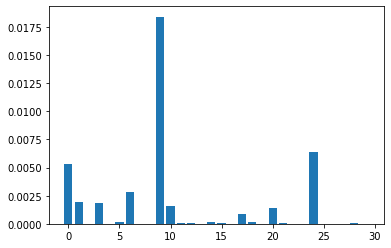

In [ ]:
# fit the model
#model_xgb.fit(revenue_df.drop(['total_revenues', 'Month'], axis=1), revenue_df['total_revenues'])
# perform permutation importance
results = permutation_importance(model_xgb, revenue_df.drop(['total_revenues', 'Month'], axis=1), revenue_df['total_revenues'], scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

**Conclusion - Feature 9 (Huawei) most important using using permutation feature importance method**

# Recursive Feature Elmination (RFE)

* [SKE Learn RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

In [6]:
model_xgb_rfe = XGBRegressor()
# fit the model, target pick only 3 features
rfe = RFE(model_xgb_rfe, 5)
rfe = rfe.fit(revenue_df.drop(['total_revenues', 'Month'], axis=1), revenue_df['total_revenues'])

NameError: name 'XGBRegressor' is not defined

In [7]:
print(rfe.support_)
print(rfe.ranking_)

NameError: name 'rfe' is not defined

**Conclusion:**
* Features 9 (Huawei), 10 and 24 (Samsung) most important, seems to agree with Permutation 
Method above